In [7]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt


In [8]:
df =pd.read_csv("C:\\Users\\LENOVO\\Downloads\\apy (1).csv")
df

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


In [15]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
246086    False
246087    False
246088    False
246089    False
246090    False
Length: 246091, dtype: bool

In [17]:
df['State_Name']

0         Andaman and Nicobar Islands
1         Andaman and Nicobar Islands
2         Andaman and Nicobar Islands
3         Andaman and Nicobar Islands
4         Andaman and Nicobar Islands
                     ...             
246086                    West Bengal
246087                    West Bengal
246088                    West Bengal
246089                    West Bengal
246090                    West Bengal
Name: State_Name, Length: 246091, dtype: object

In [19]:
df.describe()

,Crop_Year,Area,Production
count,246091.000000,2.460910e+05,2.423610e+05
mean,2005.643018,1.200282e+04,5.825034e+05
std,4.952164,5.052340e+04,1.706581e+07
min,1997.000000,4.000000e-02,0.000000e+00
25%,2002.000000,8.000000e+01,8.800000e+01
50%,2006.000000,5.820000e+02,7.290000e+02
75%,2010.000000,4.392000e+03,7.023000e+03
max,2015.000000,8.580100e+06,1.250800e+09


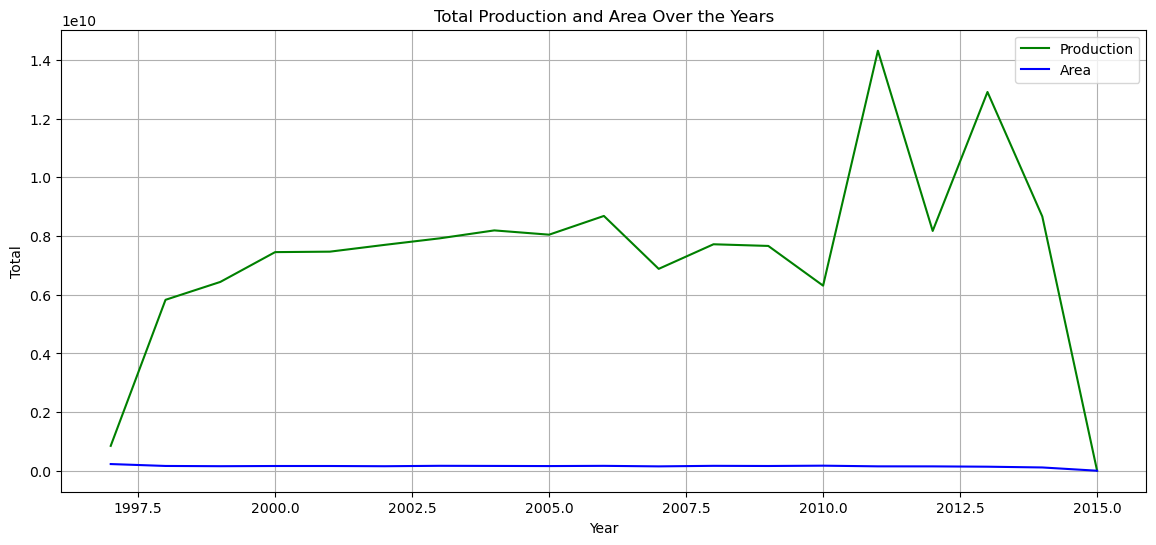

In [16]:
yearly_trend = df.groupby('Crop_Year')[['Area', 'Production']].sum().reset_index()

plt.figure(figsize=(14, 6))
sn.lineplot(x='Crop_Year', y='Production', data=yearly_trend, label='Production', color='green')
sn.lineplot(x='Crop_Year', y='Area', data=yearly_trend, label='Area', color='blue')
plt.title("Total Production and Area Over the Years")
plt.xlabel("Year")
plt.ylabel("Total")
plt.legend()
plt.grid(True)
plt.show()

In [18]:
df_clean = df.dropna(subset=["Production"])

In [22]:
sn.set_theme(style="whitegrid", palette="colorblind")


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10464\3395788483.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.boxplot(


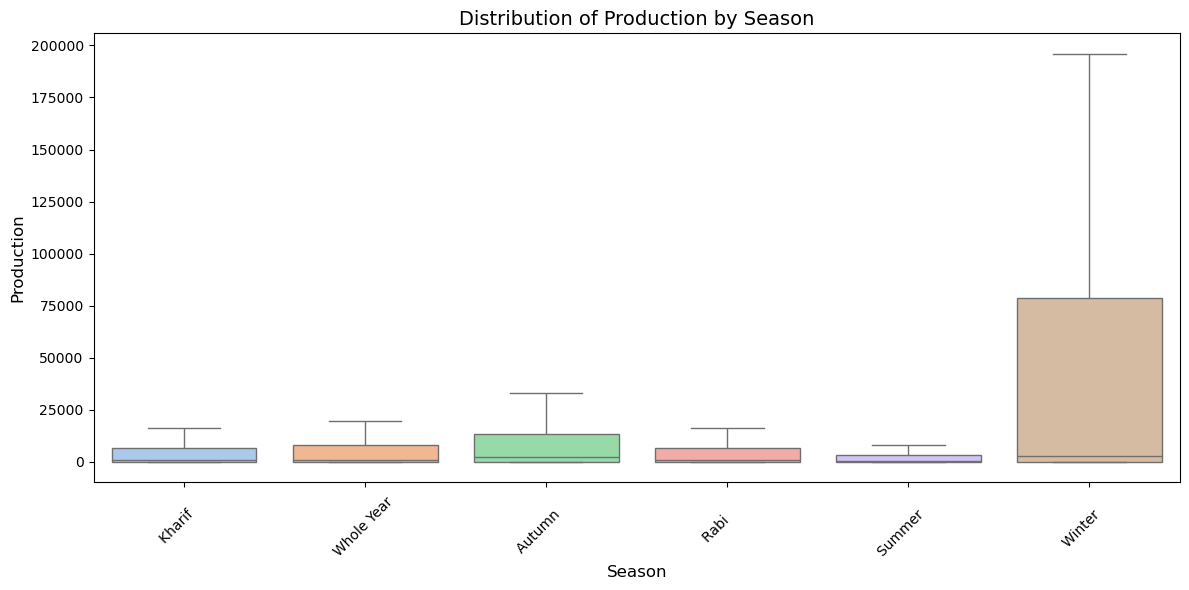

In [19]:
plt.figure(figsize=(12, 6))
sn.boxplot(
    data=df_clean,
    x="Season",
    y="Production",
    showfliers=False,
    palette="pastel"
)
plt.title("Distribution of Production by Season", fontsize=14)
plt.xticks(rotation=45)
plt.xlabel("Season", fontsize=12)
plt.ylabel("Production", fontsize=12)
plt.tight_layout()
plt.show()

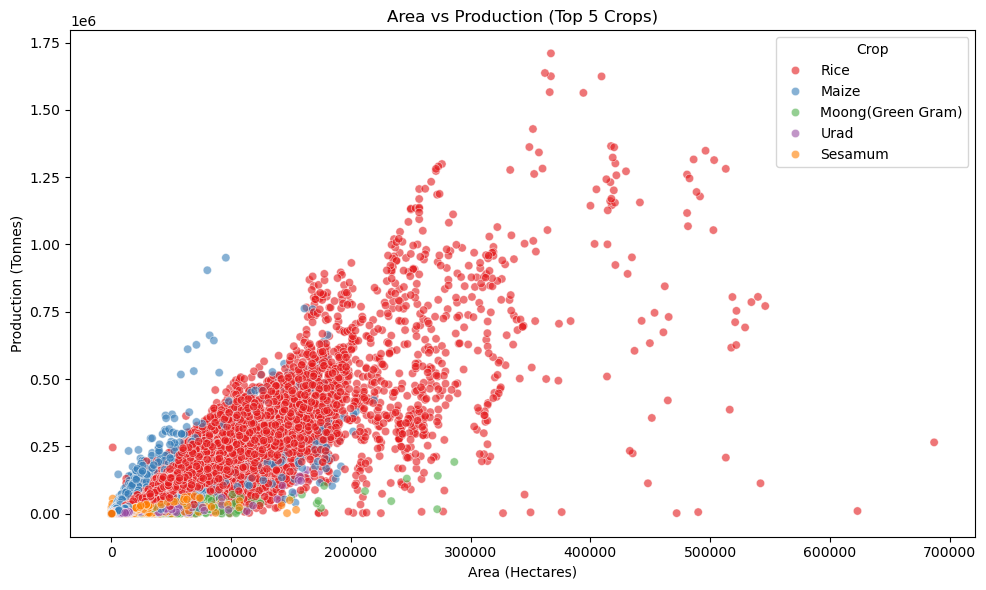

In [20]:
top_crops = df_clean['Crop'].value_counts().head(5).index
df_top_crops = df_clean[df_clean['Crop'].isin(top_crops)]

plt.figure(figsize=(10, 6))
sn.scatterplot(data=df_top_crops, x='Area', y='Production', hue='Crop', alpha=0.6, palette='Set1')
plt.title("Area vs Production (Top 5 Crops)")
plt.xlabel("Area (Hectares)")
plt.ylabel("Production (Tonnes)")
plt.legend(title='Crop')
plt.tight_layout()
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12596\2994612215.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sn.countplot(data=df_top_crops, y='Crop', order=top_15_crops, palette='coolwarm')


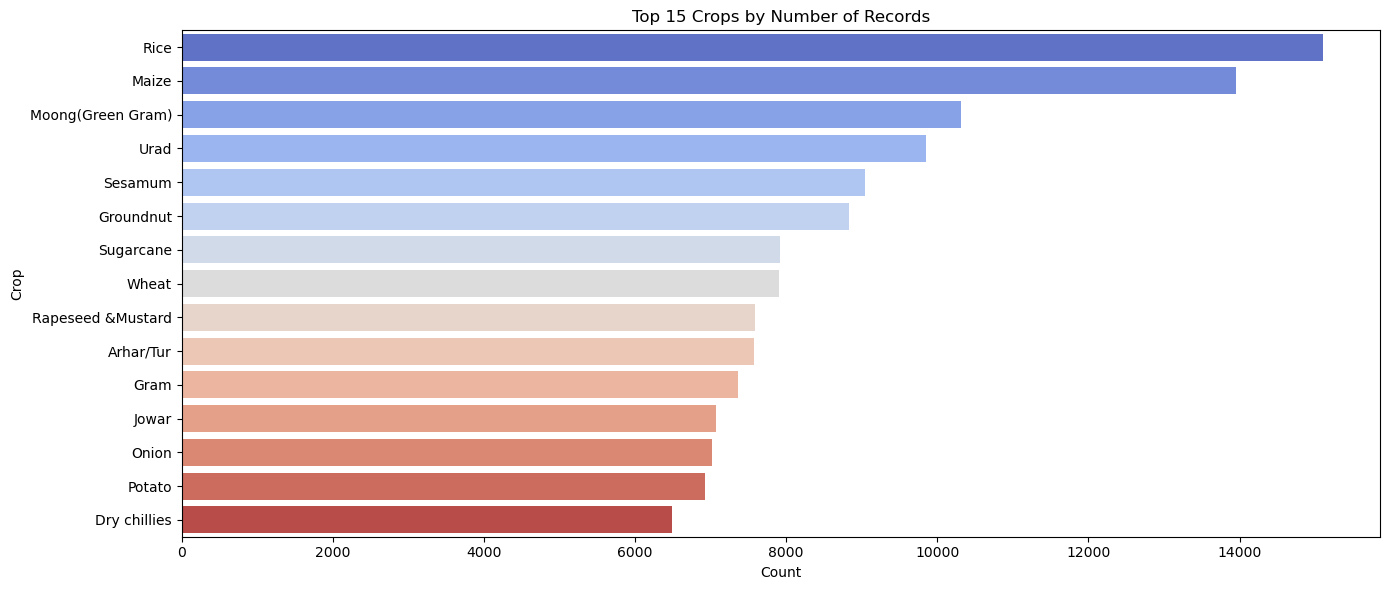

In [16]:
top_15_crops = df['Crop'].value_counts().head(15).index
df_top_crops = df[df['Crop'].isin(top_15_crops)]

plt.figure(figsize=(14, 6))
sn.countplot(data=df_top_crops, y='Crop', order=top_15_crops, palette='coolwarm')
plt.title("Top 15 Crops by Number of Records")
plt.xlabel("Count")
plt.ylabel("Crop")
plt.tight_layout()
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_7684\1108598012.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sn.barplot(


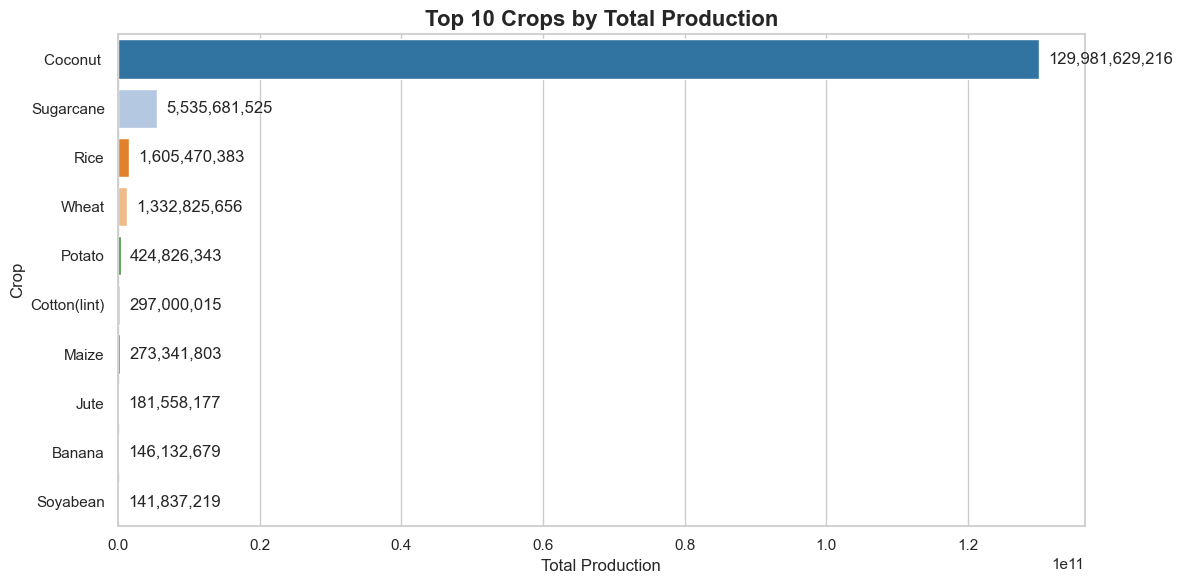

In [27]:
top_crops = df_clean.groupby('Crop')['Production'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sn.barplot(
    x=top_crops.values,
    y=top_crops.index,
    palette=sn.color_palette("tab20", n_colors=10)  # vibrant color palette
)
plt.title("Top 10 Crops by Total Production", fontsize=16, fontweight='bold')
plt.xlabel("Total Production", fontsize=12)
plt.ylabel("Crop", fontsize=12)
for index, value in enumerate(top_crops.values):
    plt.text(value + max(top_crops.values)*0.01, index, f'{int(value):,}', va='center')

plt.tight_layout()
plt.show()

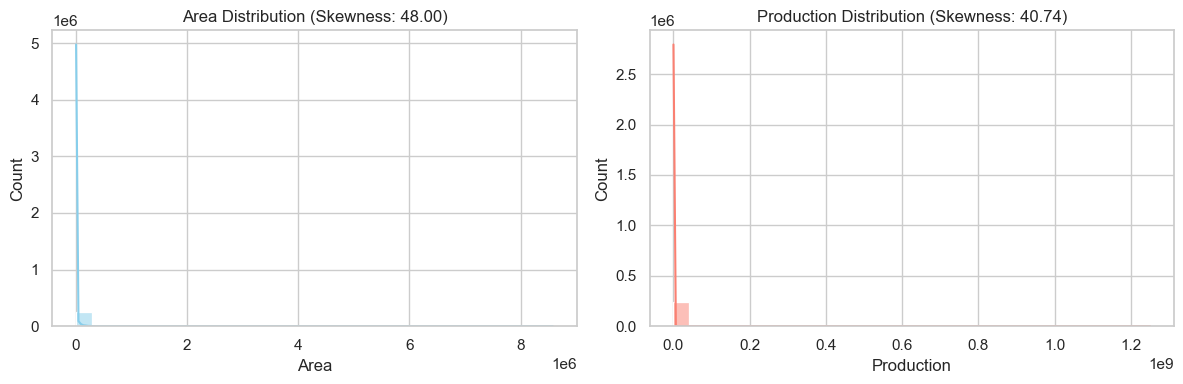

In [30]:
df = df.dropna(subset=["Production"])

# Optionally drop irrelevant columns (like 'Area', 'Season')
df = df.drop(columns=['Season', 'Area'])

# Create pivot: Average Production per Crop per Year
pivot = df.pivot_table(
    index='Crop',
    columns='Crop_Year',
    values='Production',
    aggfunc='mean'
)

# Optional: Log scale for fair visual representation
pivot_log = np.log1p(pivot)

# Plot heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(pivot_log, cmap='YlOrRd', linewidths=0.5, linecolor='gray')

plt.title("Box-Style Heatmap: Log-Scaled Avg Crop Production by Year", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Crop")
plt.tight_layout()
plt.show()

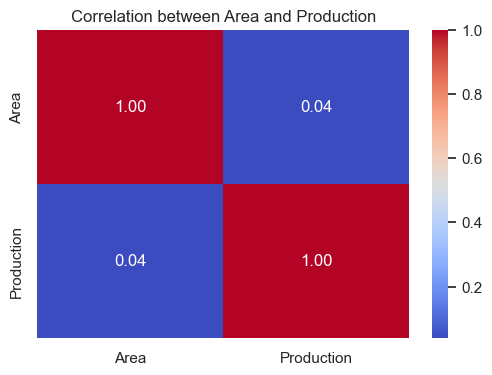

In [32]:
plt.figure(figsize=(6, 4))
correlation = df[['Area', 'Production']].corr()
sn.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation between Area and Production")
plt.show()

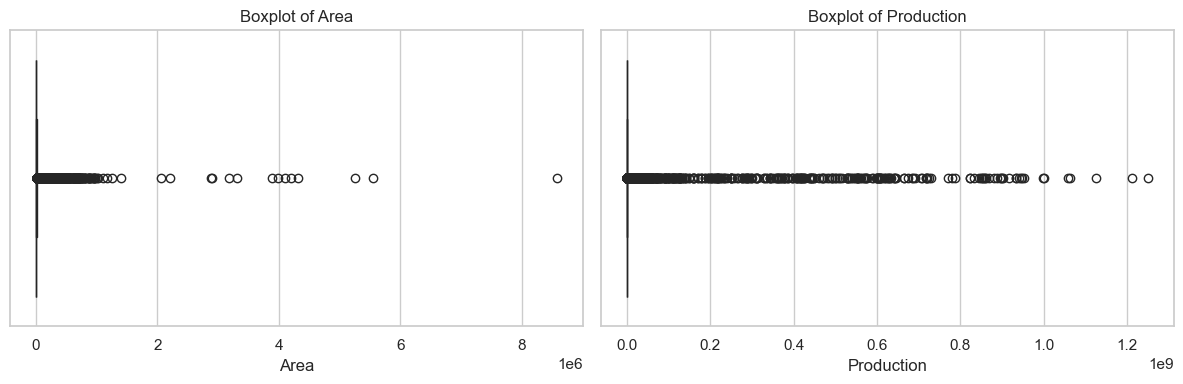

In [35]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sn.boxplot(x=df['Area'], color='green')
plt.title("Boxplot of Area")

plt.subplot(1, 2, 2)
sn.boxplot(x=df['Production'], color='green')
plt.title("Boxplot of Production")

plt.tight_layout()
plt.show()

In [10]:
column = 'Production'  # change this!


data = df[[column]].dropna()


Q1 = data[column].quantile(0.25)
Q3 = data[column].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR


outliers = data[(data[column] < lower) | (data[column] > upper)]

print(f"Found {len(outliers)} outliers.")
print(outliers)

Found 42390 outliers.
        Production
5       65100000.0
14      64430000.0
23      67490000.0
32      68580000.0
41      52380000.0
...            ...
245985    731799.0
246017    729553.0
246043     43703.0
246052    730136.0
246089    597899.0

[42390 rows x 1 columns]


In [11]:
df['Production_capped'] = df['Production'].clip(lower=lower, upper=upper)



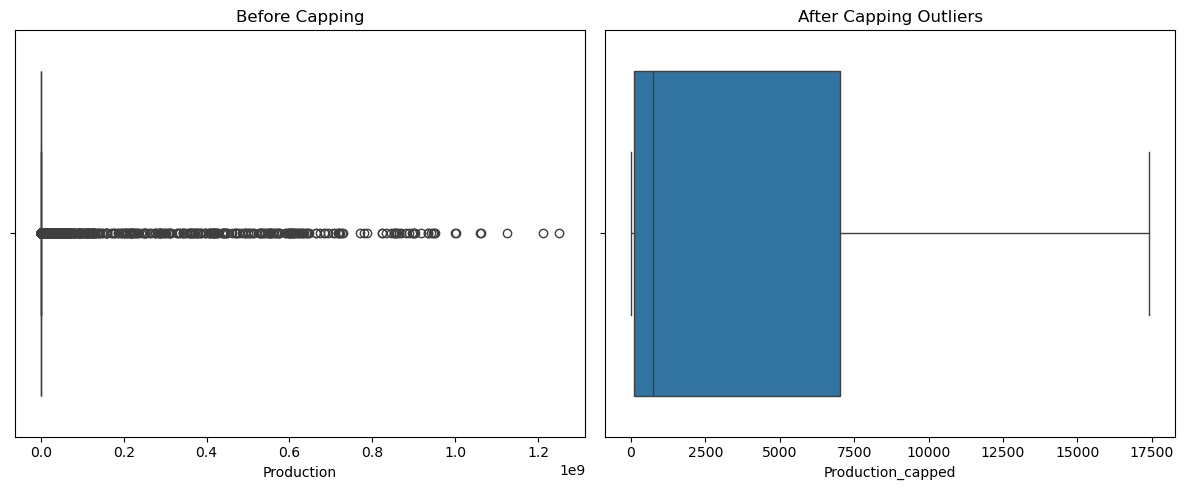

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))

# Original
plt.subplot(1, 2, 1)
sns.boxplot(x=df['Production'])
plt.title("Before Capping")

# Capped
plt.subplot(1, 2, 2)
sns.boxplot(x=df['Production_capped'])
plt.title("After Capping Outliers")

plt.tight_layout()
plt.show()
